In [2]:
#%%#############
###paths#####
#############
import sys
import os

pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
#############

from numerical.cn_edgegrowth2_numba import cn_edgegrowth2 as cn_edgegrowth2_numba
from numerical.cn_edgegrowth2 import cn_edgegrowth2
from numerical.cn_nogrowth import cn_nogrowth
from numerical.cn_nogrowth_numba import cn_nogrowth_numba

from numerical.cn_plot import plot1D, surfpattern
from numerical.run_plot_1D import *
from pattern_classification.pattern_1D_classification import *
import pickle
import matplotlib.pyplot as plt
import time
import numpy as np

### Numerical params

In [3]:
#system parameters
circuit_n = 'turinghill'
variant=9
n_param_sets = 2000000


# #solver parameters
# L=30; dx =0.1; J = int(L/dx)
# T =1000; dt = 0.02; N = int(T/dt)


#solver parameters
L=5; dx =0.1; J = int(L/dx)
T =50; dt = 0.02; N = int(T/dt)
boundaryCoeff=1;rate=L/T
suggesteddt = float(dx*dx*2)

print(f'suggested dt = {suggesteddt}, used dt = {dt}')

suggesteddt = float(dx*dx*2)
print(f'suggested dt = {suggesteddt}, used dt = {dt}')


suggested dt = 0.020000000000000004, used dt = 0.02
suggested dt = 0.020000000000000004, used dt = 0.02


### Model params

In [4]:

df= pickle.load( open(modellingpath + "/growth/out/analytical/turing/turing_df_%s_variant%r_%rparametersets.pkl"%(circuit_n,variant,n_param_sets), "rb"))
# # df = multiple_df.xs(0, level=1)

# # parID= (14414,0) #parameter set to use
# parID= (3) #parameter set to use
# par_dict = df.iloc[parID].to_dict()
# print(par_dict)
# # parameter_to_modify = ['ba', 'bb', 'Va', 'Vb', 'mua', 'mub']
# # for parameter in parameter_to_modify:
# #     par_dict[parameter] = par_dict[parameter] 
# # par_dict = df.iloc[parID].to_dict()
# print(f'estimated wavelenght = {par_dict["estimated_wvl"]}')




Execution time: 00:01:00


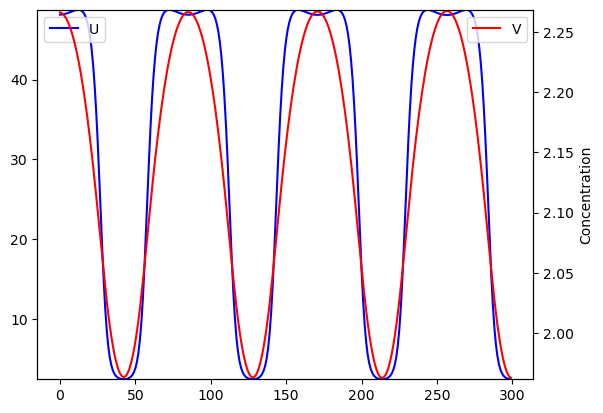

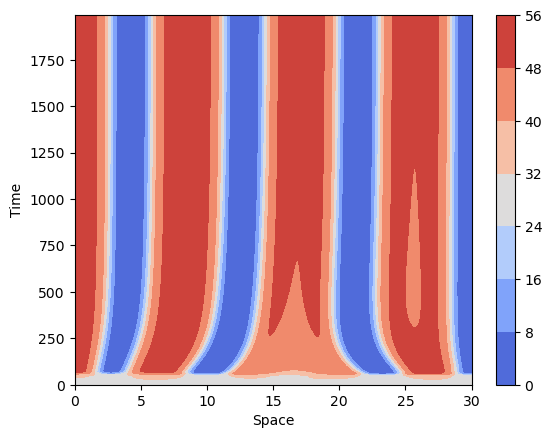

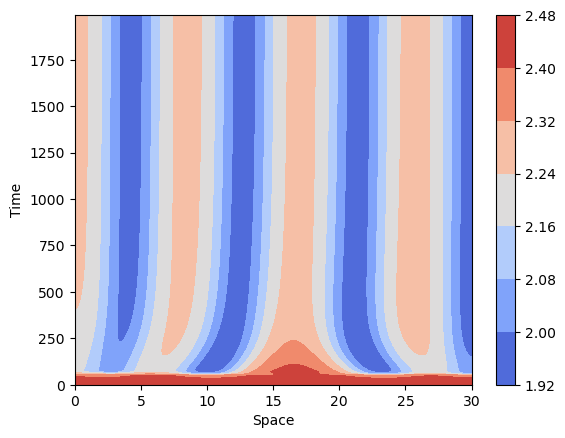

pattern:Stationary irregular pattern, converged:True, flat:False, regular:False 
-----------------------------------------



In [5]:

# #solver parameters
# L=30; dx =0.1; J = int(L/dx)
# T =1000; dt = 0.02; N = int(T/dt)

for parID in df.index[9:10]:
    par_dict = par_dict = df.loc[parID].to_dict()


    #solver parameters
    L=50; dx =0.1; J = int(L/dx)
    T =2000; dt = 0.02; N = int(T/dt)
    # T =100; dt = 0.02; N = int(T/dt)


    boundaryCoeff=1;rate=L/T
    suggesteddt = float(dx*dx*2)


    U_final, U_record = simulate_plot_nogrowth(par_dict, L, J, T, N, circuit_n,tqdm_disable=True)
    pattern, converged, flat, regular = patternClassification(U_final, U_record)
    print(f'pattern:{pattern}, converged:{ converged}, flat:{ flat}, regular:{regular} ')
    print('-----------------------------------------')
    print('')

Execution time: 00:00:31


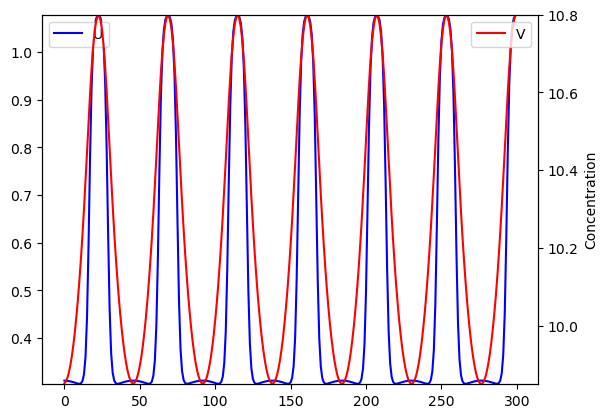

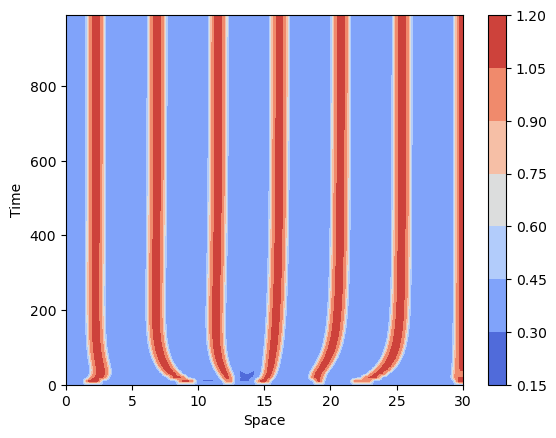

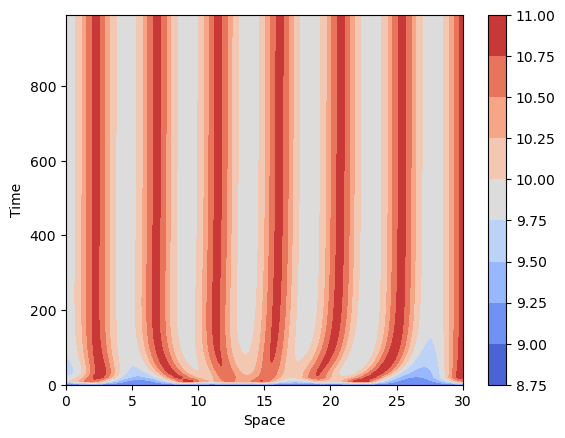

pattern:Stationary regular pattern, converged:True, flat:False, regular:True 
-----------------------------------------

Execution time: 00:00:31


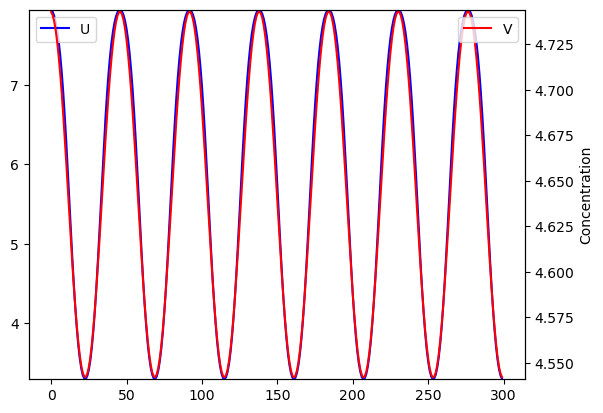

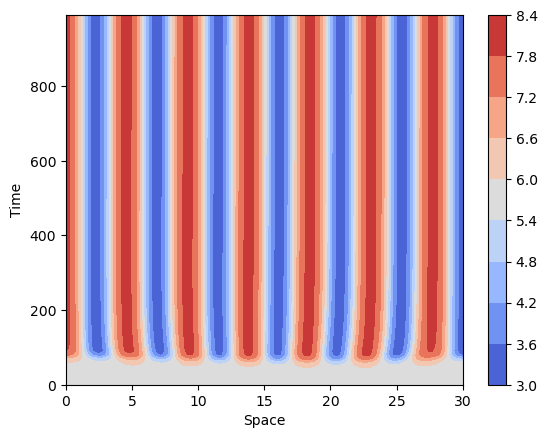

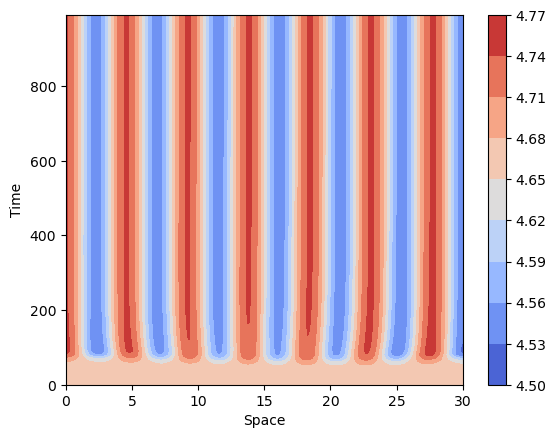

pattern:Stationary regular pattern, converged:True, flat:False, regular:True 
-----------------------------------------

Execution time: 00:00:33


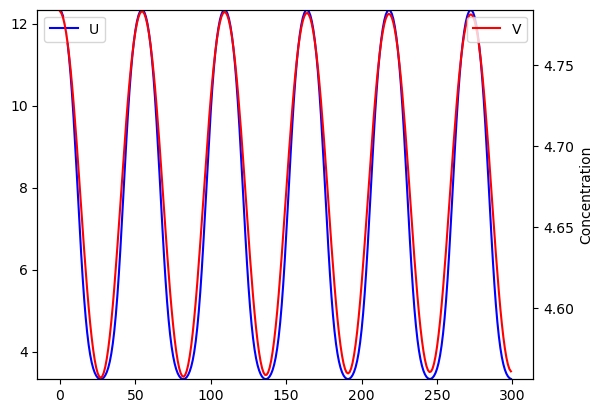

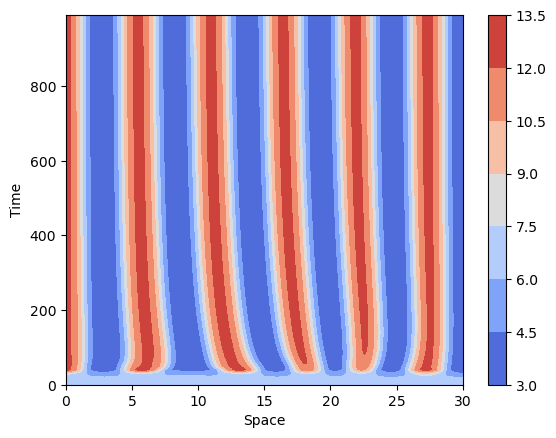

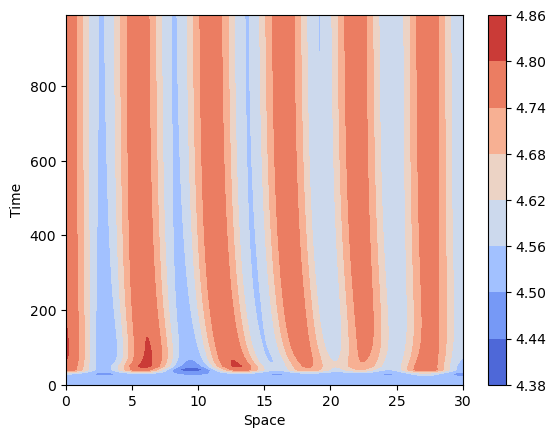

pattern:Stationary regular pattern, converged:True, flat:False, regular:True 
-----------------------------------------

Execution time: 00:00:31


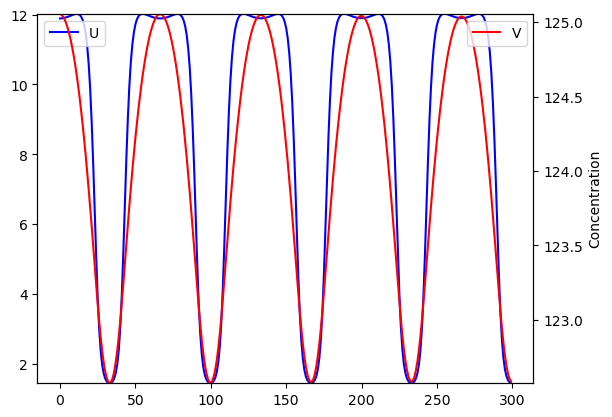

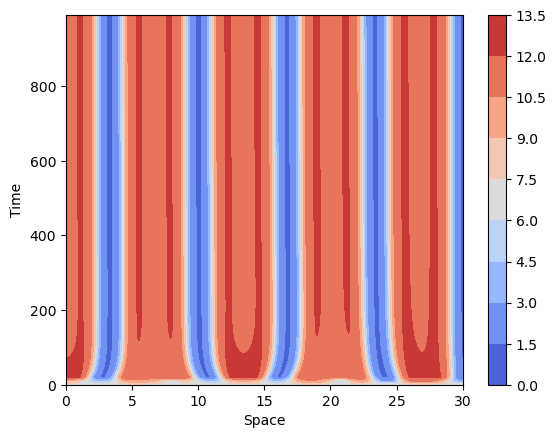

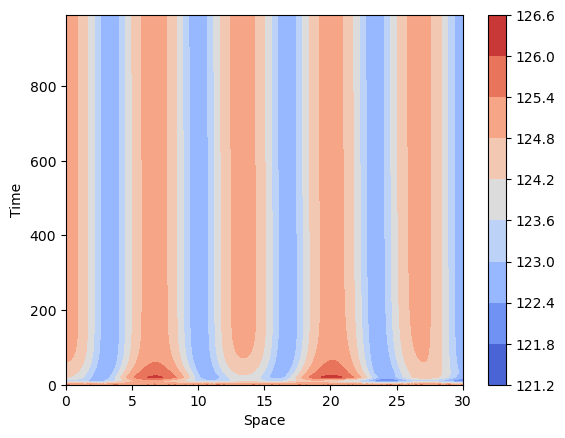

pattern:Stationary regular pattern, converged:True, flat:False, regular:True 
-----------------------------------------

Execution time: 00:00:30


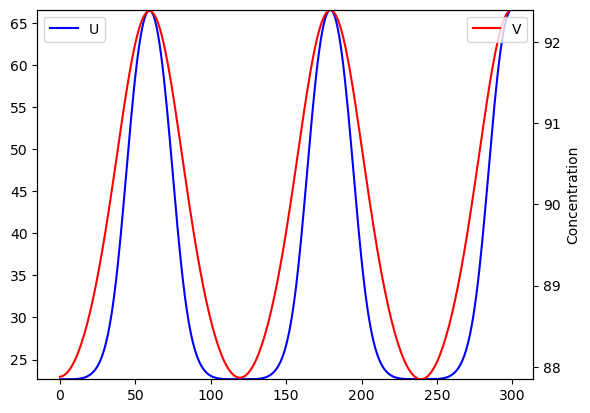

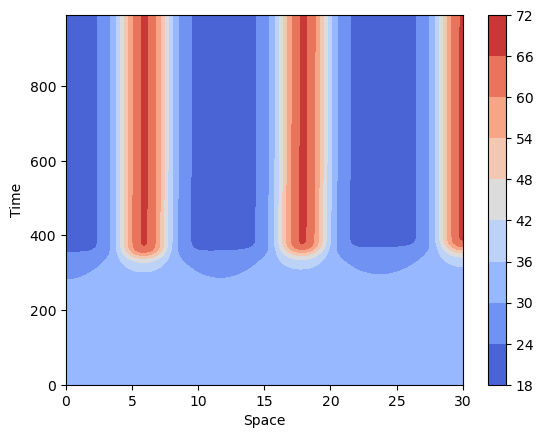

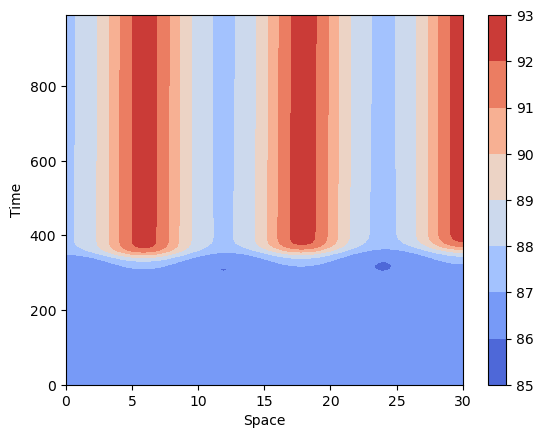

pattern:Stationary irregular pattern, converged:True, flat:False, regular:False 
-----------------------------------------

Execution time: 00:00:32


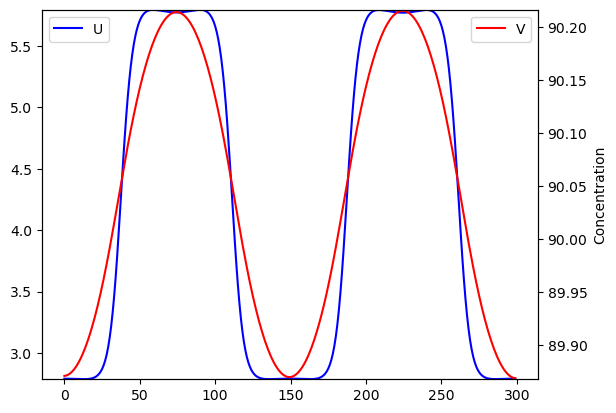

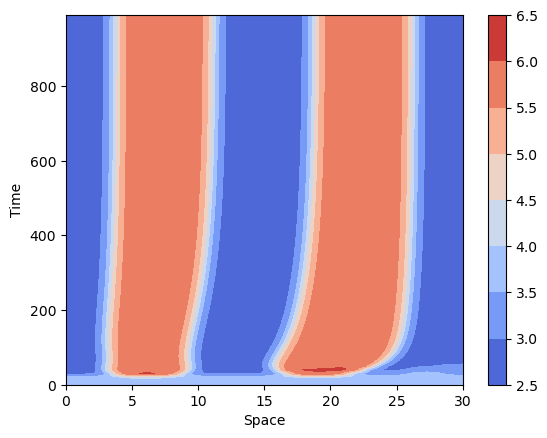

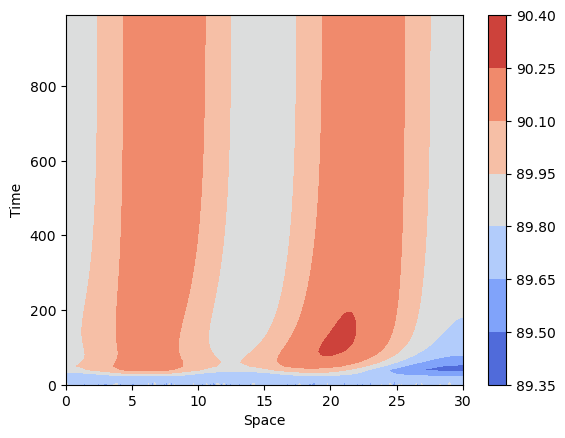

pattern:Stationary irregular pattern, converged:True, flat:False, regular:False 
-----------------------------------------

Execution time: 00:00:29


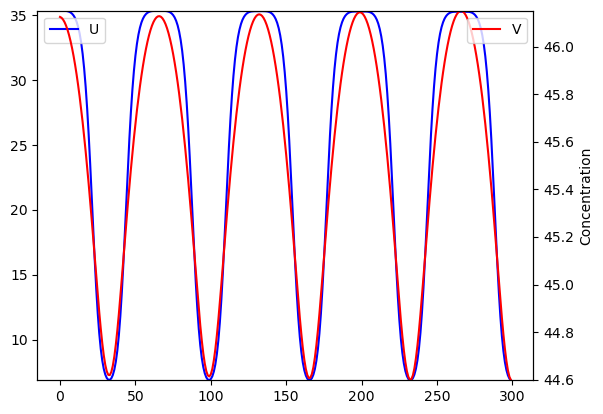

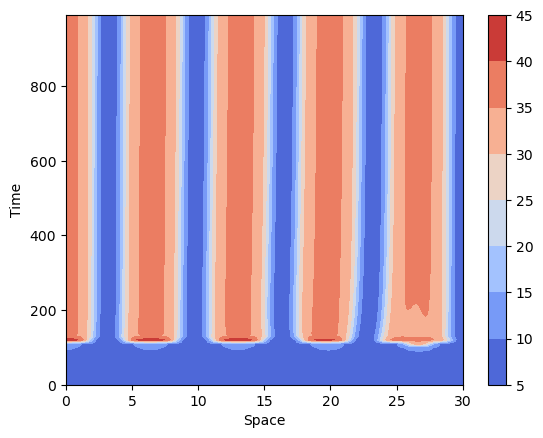

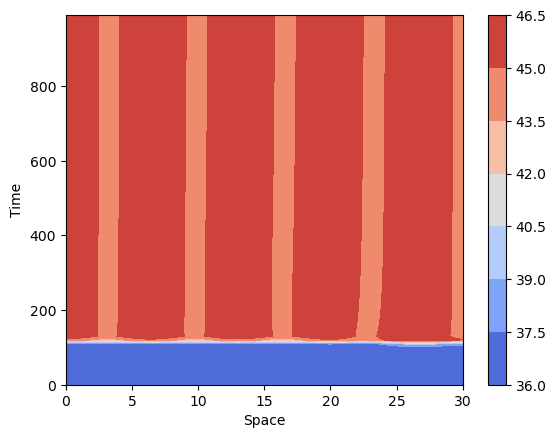

pattern:Stationary regular pattern, converged:True, flat:False, regular:True 
-----------------------------------------

Execution time: 00:00:29


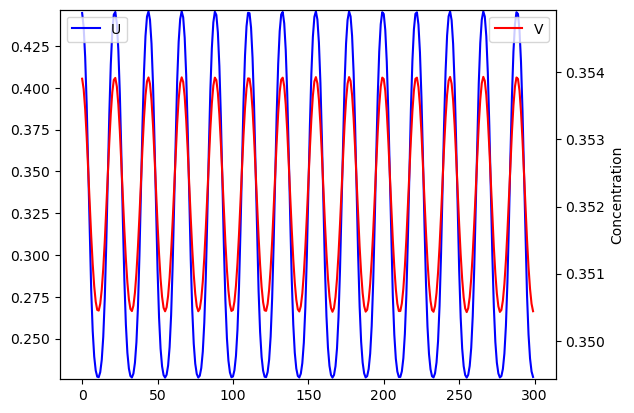

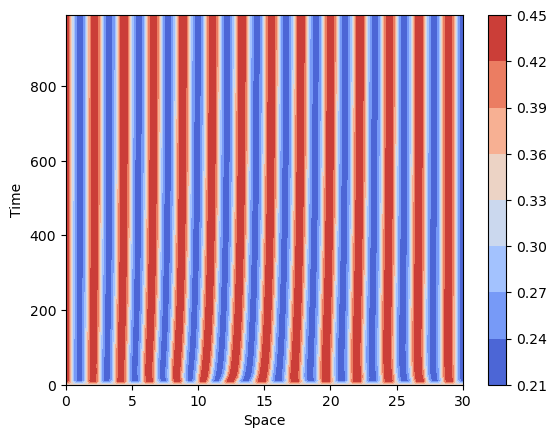

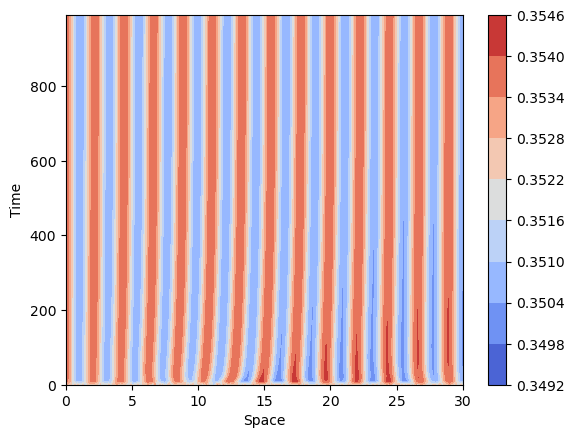

pattern:Stationary regular pattern, converged:True, flat:False, regular:True 
-----------------------------------------

Execution time: 00:00:28


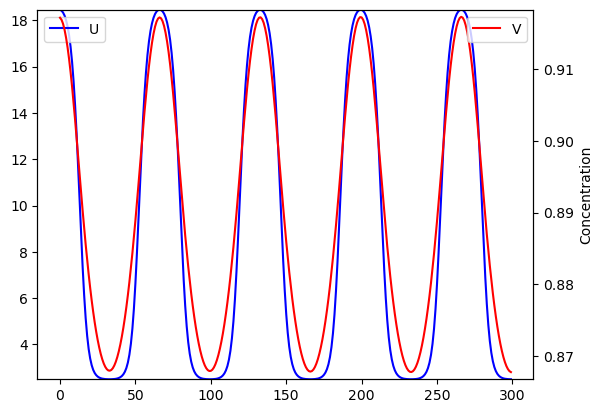

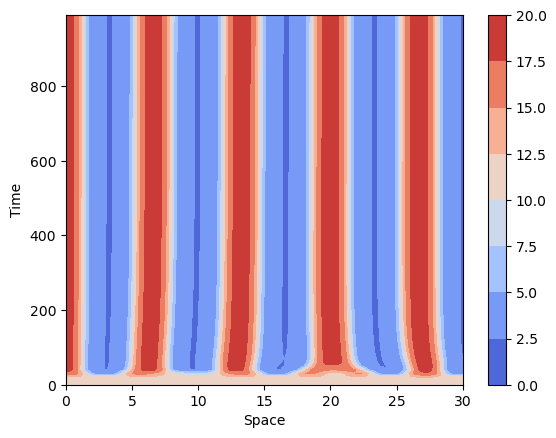

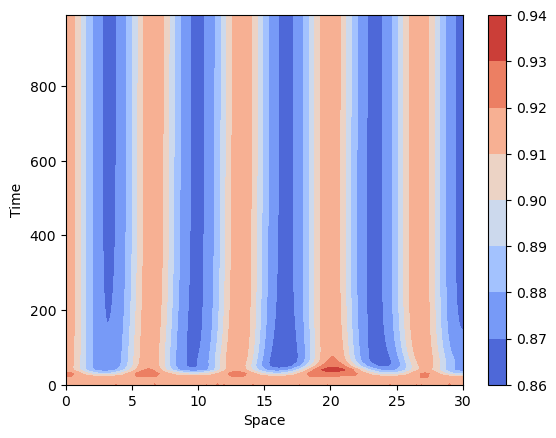

pattern:Stationary regular pattern, converged:True, flat:False, regular:True 
-----------------------------------------

Execution time: 00:00:30


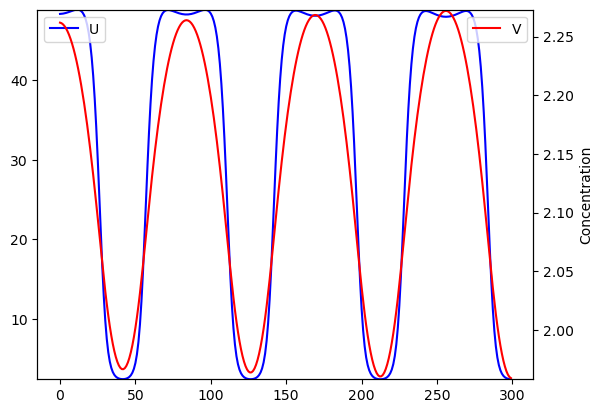

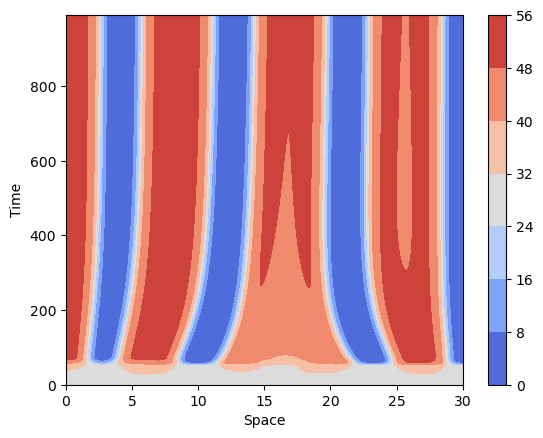

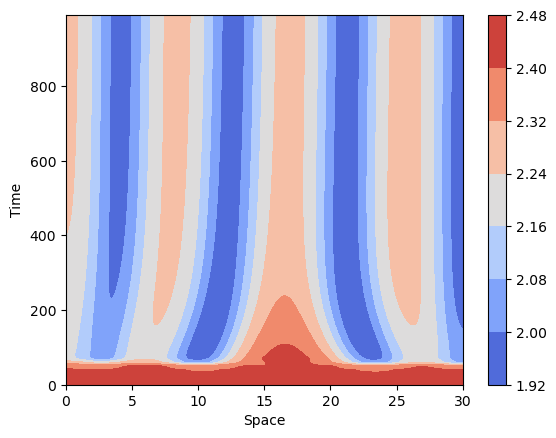

pattern:Non-Stationary regular pattern, converged:False, flat:False, regular:True 
-----------------------------------------



In [6]:

# #solver parameters
# L=30; dx =0.1; J = int(L/dx)
# T =1000; dt = 0.02; N = int(T/dt)

for parID in df.index[:10]:
    par_dict = par_dict = df.loc[parID].to_dict()


    #solver parameters
    L=30; dx =0.1; J = int(L/dx)
    T =1000; dt = 0.02; N = int(T/dt)
    # T =100; dt = 0.02; N = int(T/dt)


    boundaryCoeff=1;rate=L/T
    suggesteddt = float(dx*dx*2)


    U_final, U_record = simulate_plot_nogrowth(par_dict, L, J, T, N, circuit_n,tqdm_disable=True)
    pattern, converged, flat, regular = patternClassification(U_final, U_record)
    print(f'pattern:{pattern}, converged:{ converged}, flat:{ flat}, regular:{regular} ')
    print('-----------------------------------------')
    print('')

100%|██████████| 100000/100000 [01:11<00:00, 1398.51it/s]


Execution time no numba: 00:01:11


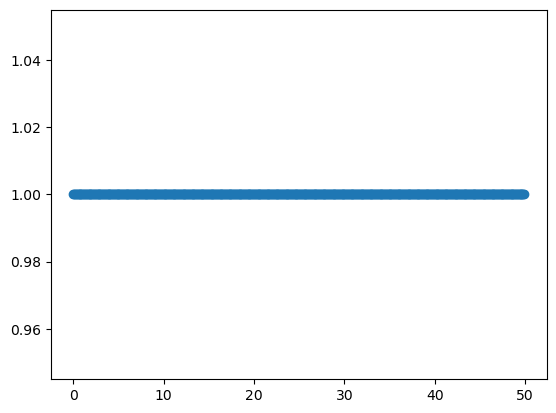

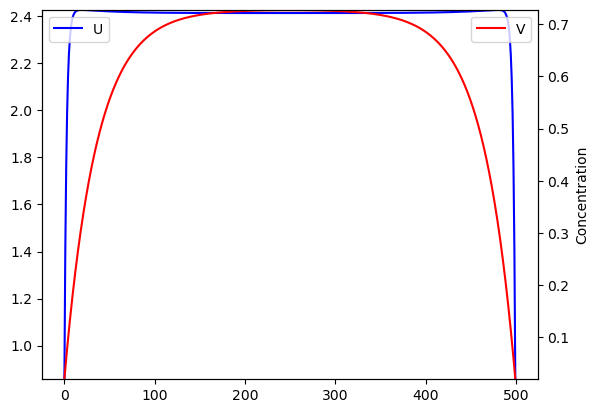

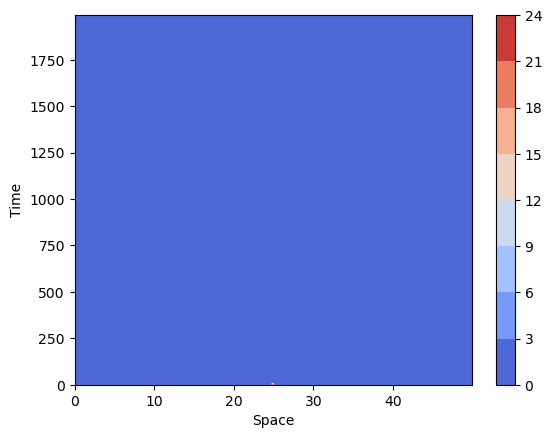

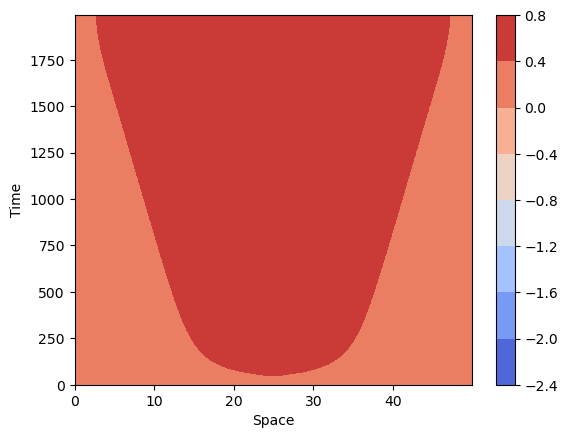

pattern:Non-Stationary irregular pattern, converged:False, flat:False, regular:False 
-----------------------------------------



In [7]:

# #solver parameters
# L=30; dx =0.1; J = int(L/dx)
# T =1000; dt = 0.02; N = int(T/dt)

for parID in df.index[9:10]:
    par_dict = par_dict = df.loc[parID].to_dict()


    #solver parameters
    L=50; dx =0.1; J = int(L/dx)
    T =2000; dt = 0.02; N = int(T/dt)
    # T =100; dt = 0.02; N = int(T/dt)


    boundaryCoeff=1;rate=L/T
    suggesteddt = float(dx*dx*2)


    U_final, U_record = simulate_plot_growth(par_dict, L, J, T, N, circuit_n,rate=rate,tqdm_disable=False)
    pattern, converged, flat, regular = patternClassification(U_final, U_record)
    print(f'pattern:{pattern}, converged:{ converged}, flat:{ flat}, regular:{regular} ')
    print('-----------------------------------------')
    print('')